# Stardust grain plots with `stardustlib`
This is a preview / idea gathering / development notebook to make stardust grain plots with a new python module called `stardustlib`. Currently, this module only exists as a python script and the data are in a subfolder right here named `data`. This clearly is less than ideal, however, I will update the notebook with the required installs, etc., as the module comes along.

If you have any comments, questions, improvement ideas, filters, etc., please let me know! This is the planning and testing phase, so everything can be changed and adopted.

The example shown here is for plotting Ru-102 as a function of Ru-104. The stardust data should be automatically processes and filtered via `stardustlib`. Model data can be processed and converted to $\delta$-values using `iniabu`.

## Imports (and Installs)
For now only imports. `iniabu` is imported directly with abundances in mass fractions. This way we can directly use it with model data to calculate $\delta$-values. Stardustlib for now is loaded from python file in the same folder with data available there, however, at a later point will be changed to update to the latest version from github and eventually pypi.

In [1]:
from iniabu import inimf  # iniabu module with abundances as mass fractions - for models!
import matplotlib.pyplot as plt
import numpy as np

import stardustlib
sdl = stardustlib.StarDust()  # will be replaced with __init__.py

Really early dev version... user beware!


## Transfer model data to $\delta$-values

### Fake model data
Ideally, to plot along your models, you only have to replace the next three vectors with the mass fraction results from your simulations. I assume that these models abundances are in mass fractions.

In [2]:
def x_diluted(dilute,x,xini):
    xdil = dilute*x + (1.-dilute)*xini
    return xdil

# Ru-100
print ("Ru-100:",x_diluted(0.0048103,1.85100E-13,1.3285404636e-12))

# Ru-102
print ("Ru-102:",x_diluted(0.0048103,4.25026E-08,3.3931556079e-12))

# Ru-104
print ("Ru-104:",x_diluted(0.0048103,8.90067E-09,2.0418190769e-12))

Ru-100: 1.3230401719379447e-12
Ru-102: 2.078270902914793e-10
Ru-104: 4.4846890215594384e-11


In [3]:
#m_ru100 = np.array([0.124, 0.125, 0.126])
#m_ru102 = np.array([0.32, 0.28, 0.24])
#m_ru104 = np.array([0.18, 0.1, 0.05])

m_ru100 = np.array([1.32304e-12, 1.32304e-12])
m_ru102 = np.array([2.07827e-10, 8.25611e-11])
m_ru104 = np.array([4.48469e-11, 5.75558e-11])

### Convert model data to $\delta$ values, ratioed to Ru-100, using `iniabu`
The conversion assumes by default Lodders et al. (2009) as the solar values. This can be changed if necessary.

In [4]:
dm_ru102 = inimf.iso_delta("Ru-102", "Ru-100", m_ru102/m_ru100)
dm_ru104 = inimf.iso_delta("Ru-104", "Ru-100", m_ru104/m_ru100)

## Get the stardust grain data

Let's get the stardust grain data using `stardustlib`. Here we will first apply some filters to the data:
- Select only the Ru isotopes
- Filter for "Savina et al., 2004" data

Then we get the plotting ratios `xdat`, `ydat`, `xerr`, and `yerr` for subsequent plotting.

In [5]:
# Filter for Mainstream and Unclassified grains (All data from Savina, Science)
sdl.filter_type(["M", "U"])

# define isotopes to plot and get data from DB
x_isos = ("Ru-104", "Ru-100")
y_isos = ("Ru-102", "Ru-100")
# Now grab our x and y data to plot:
xdat, ydat, xerr, yerr = sdl.return_ratios(x_isos, y_isos)

## Create the plot

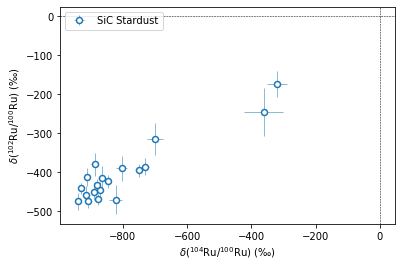

In [6]:
fig, ax = plt.subplots(1, 1)

# lines at zero
ax.axhline(0, linestyle='dashed', linewidth=0.5, color='k')
ax.axvline(0, linestyle='dashed', linewidth=0.5, color='k')

# plot the data
ax.errorbar(xdat, ydat, xerr=xerr, yerr=yerr, fmt='o', mew=1.5, mfc='w', linewidth=0.5, label='SiC Stardust')
# plot the models
#ax.plot(dm_ru104, dm_ru102, 's--', label='2nd peak i-process (default vs new rates)')

# some formatting
ax.legend(loc="upper left")
ax.set_xlabel("$\\delta(^{104}\\mathrm{Ru}/^{100}\\mathrm{Ru})$ (‰)")
ax.set_ylabel("$\\delta(^{102}\\mathrm{Ru}/^{100}\\mathrm{Ru})$ (‰)")

plt.show()